In [78]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

- Exercici 1

Agafa un conjunt de dades de tema esportiu que t'agradi i selecciona un atribut del conjunt de dades. Calcula la moda, la mediana, la desviació estàndard i la mitjana aritmètica. 

In [7]:
mlb = pd.read_csv('MLB.txt', delimiter = "\t")

In [9]:
mlb.head()

,player,team,position,salary
0,Brandon Webb,Arizona Diamondbacks,Pitcher,8500.0
1,Danny Haren,Arizona Diamondbacks,Pitcher,8250.0
2,Chris Snyder,Arizona Diamondbacks,Catcher,5250.0
3,Edwin Jackson,Arizona Diamondbacks,Pitcher,4600.0
4,Adam LaRoche,Arizona Diamondbacks,First Baseman,4500.0


In [10]:
mlb['salary']

0      8500.0
1      8250.0
2      5250.0
3      4600.0
4      4500.0
        ...  
823     401.0
824     400.0
825     400.0
826     400.0
827     400.0
Name: salary, Length: 828, dtype: float64

In [27]:
mode  = mlb['salary'].mode()
median= mlb['salary'].median()
mean  = mlb['salary'].mean()
std   = mlb['salary'].std()


In [28]:
print(mode[0],median,mean,std)

400.0 1093.75 3281.8283393719807 4465.448980170665


- Exercici 2
Continuant amb les dades de tema esportiu, selecciona dos atributs i calcula'n la seva correlació. 


In [79]:
athletes =pd.read_csv('athlete_events.csv')
bcn_olimpiadas = athletes[(athletes.Year == 1992) & (athletes.Season =='Summer')]
bcn_olimpiadas.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
96,33,Mika Lauri Aarnikka,M,24.0,187.0,76.0,Finland,FIN,1992 Summer,1992,Summer,Barcelona,Sailing,Sailing Men's Two Person Dinghy,NaN
118,43,Morten Gjerdrum Aasen,M,34.0,185.0,75.0,Norway,NOR,1992 Summer,1992,Summer,Barcelona,Equestrianism,"Equestrianism Mixed Jumping, Individual",NaN
137,50,Arvi Aavik,M,22.0,185.0,106.0,Estonia,EST,1992 Summer,1992,Summer,Barcelona,Wrestling,"Wrestling Men's Heavyweight, Freestyle",NaN
160,64,M'Bairo Abakar,M,31.0,NaN,NaN,Chad,CHA,1992 Summer,1992,Summer,Barcelona,Judo,Judo Men's Half-Middleweight,NaN


In [80]:
region = pd.read_csv('noc_regions.csv')
display(region.head())
region.drop('notes',axis=1,inplace=True)
region.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


,NOC,region
0,AFG,Afghanistan
1,AHO,Curacao
2,ALB,Albania
3,ALG,Algeria
4,AND,Andorra


In [104]:
#merge data
athletes =athletes.merge(region, left_on='NOC', right_on='NOC')

In [109]:
bcn_olimpiadas = athletes[(athletes.Year == 1992)&(athletes.Season=='Summer')]

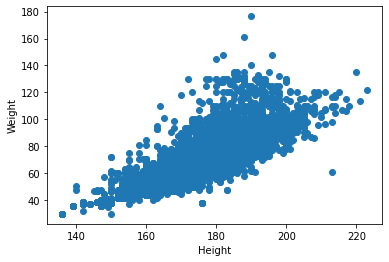

In [127]:
atribut_A =bcn_olimpiadas['Height']
atribut_B = bcn_olimpiadas['Weight']
plt.scatter(atribut_A,atribut_B)
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()

In [200]:
corr = atribut_A.corr(atribut_B)
print(f'correlation is {corr}')

correlation is 0.8063155211359477


- Exercici 3

Continuant amb les dades de tema esportiu, calcula la correlació de tots els atributs entre sí i representa'ls en una matriu amb diferents colors d'intensitat.

In [216]:
spain_M = spain[spain.Sex == 'M'][['Age','Height','Weight']].dropna().reset_index(drop=True)
spain_F = spain[spain.Sex == 'F'][['Age','Height','Weight']].dropna().reset_index(drop=True)

             Age    Height    Weight
Age     1.000000 -0.039194  0.049060
Height -0.039194  1.000000  0.773717
Weight  0.049060  0.773717  1.000000


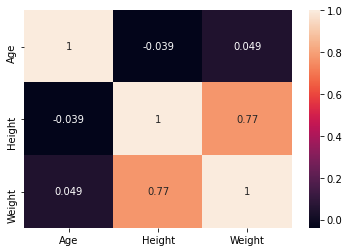

In [217]:
corr = spain_M.corr()
print(corr)
sns.heatmap(corr, annot=True)
plt.show()

- Exercici 4

Continuant amb les dades de tema esportiu, selecciona un atribut i calcula la mitjana geomètrica i la mitjana harmònica.

In [229]:
edad_atletas_male = spain_M.Age
edad_atletas_female = spain_F.Age
print(f'mean age male: {round(edad_atletas_male.mean())}, mean age female: {round(edad_atletas_female.mean())}')

mean age male: 26, mean age female: 22


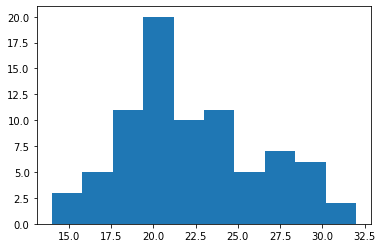

In [231]:
plt.hist(edad_atletas_female)
plt.show()

The Geometric Mean is a special type of average where we multiply the numbers together and then take a square root (for two numbers), cube root (for three numbers) etc... for N. numbers is the N- root
* square root is x**(1/2)
* cube root is x**(1/3)
* ...
* N- root is x**(1/N)

In [239]:
edades = edad_atletas_female.values
N = edades.shape[0]

In [240]:
mediana_geometrica = 1
for edad in edades:
    mediana_geometrica *=edad
    
mediana_geometrica = mediana_geometrica**(1/N)
print(f'geometric mean: {round(mediana_geometrica)}')

geometric median: 22


The harmonic mean is the reciprocal of the average of the reciprocals 
Harmonic_mean = N/(1/a+1/b+1/c + ....)


In [245]:
mediana_reciprocal = 0
for edad in edades:
    mediana_reciprocal +=1/edad
    
inverso_mediana_reciproca = np.mean(mediana_reciprocal)/N
print(f'Harmonic mean: {round(1/inverso_mediana_reciproca)}')

Harmonic mean: 21
